In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dill
# import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# データ読み込み
df = pd.read_csv('./data/joinery_training.txt')
# データとラベルに分類（データの1行目にラベルデータが必要）
# x = df.loc[:, ['pattern','height','width','top','material','wood','sizecategory','door']]
x = df.loc[:, ['symbol','block','door','pl','pc','height','width','top','material','wood','sizecategory']]
y = df.loc[:, "ups"]
# print(x.shape)
# print(y.shape)

In [3]:
# 分類
x_train, x_test, y_train, y_test = train_test_split(x, y)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)
# x_train.head()
# y_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 39006 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12387 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12383 missing from c

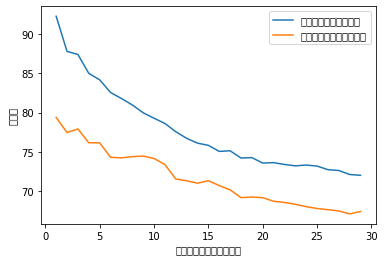

In [4]:
# 教師データに対する予測の正解率を格納
training_accuracy = []
# テストデータに対する予測の正解率を格納
test_accuracy = []# kの値を格納(グラフのプロットに用いるためリストを用意)
neighbors_settings = [i for i in range(1, 30)]
for n_neighbors in neighbors_settings:
    # KNN分類器を作成(k=n_neighbors)
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    # 教師データを用いて学習
    clf.fit(x_train, y_train)
    # k=n_neighborsのときのKNNの教師データに対する予測の正解率をリストに送る
    training_accuracy.append(clf.score(x_train, y_train) * 100)
    # k=n_neighborsのときのKNNのテストデータに対する予測の正解率をリストに送る
    test_accuracy.append(clf.score(x_test, y_test) * 100)
# 以下、グラフ表示のための処理
plt.plot(neighbors_settings, training_accuracy,label='教師用データの正解率')
plt.plot(neighbors_settings, test_accuracy,label='テスト用データの正解率')
plt.ylabel('正解率')
plt.xlabel('分類に使ったデータの数')
plt.legend()
plt.show()

In [8]:
# 比較数（この値で正解率が変わる）
clf = KNeighborsClassifier(n_neighbors=1)
# 学習
clf.fit(x_train,y_train)
print(clf.score(x_test,y_test))
# 未知のデータ
# pattern,height,width,top,material,wood,sizecategory,door
# unknown_data = [[500006,750,1785,1400,0,9900,2,2]] #金属製+その他
# unknown_data = [[500006,1750,1715,1750,200,300,0,2]] #木製+襖
# unknown_data = [[500006,750,1785,1400,200,500,200,2]] #その他金属製+その他
unknown_data = [[9,3,1,6,0,0.35,0.82,2.15,2,1,2]] # 02510180
# 推論
print(clf.predict(unknown_data))

0.7938461538461539
["'02510180'"]


In [6]:
# モデルを保存する
fp = 'joinery_autoup.model'
# pickle.dump(clf, open(fp, 'wb'))
# dill.dump(clf, open(fp,'wb'))

In [7]:
# 学習済みモデルを復元する
# model = pickle.load(open(fp,'rb'))
# model = dill.load(open(fp,'rb'))